[![Abrir no Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/labren/sonda-curadoria/Analise_Exploratoria_Solarimetricos.ipynb)

# Análise Exploratória de Dados Solarimétricos
Este notebook realiza uma análise exploratória dos dados solarimétricos da rede SONDA.

## Importação das Bibliotecas
- **duckdb**: Banco de dados relacional que permite consultas SQL em arquivos locais
- **matplotlib.pyplot**: Biblioteca para criação de gráficos
- **seaborn**: Biblioteca para visualização de dados estatísticos

In [6]:
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

  1%|          | 47.2M/6.15G [01:27<3:08:17, 541kB/s]


## Configuração Inicial
Definindo o caminho do arquivo parquet contendo os dados solarimétricos e o nome da tabela.

In [ ]:
# Instalar gdown para descargar el archivo de Google Drive
!python -m pip install -q -U gdown

import gdown

url = 'https://drive.google.com/uc?id=1JJ084_fEB3PJoiKrrFCEfxoyyz7u6mU9'
gdown.download(url, 'Solarimetrica.parquet', quiet=False)

  1%|          | 47.2M/6.15G [00:25<16:06, 6.32MB/s]

In [ ]:
# Configurações para o nome do arquivo e da tabela
ARQUIVO_SOLARIMETRO = './Solarimetrica.parquet'
NOME_DA_TABELA = 'solarimetrica'

## Conexão com o Banco de Dados
Criando uma conexão em memória com o DuckDB.

In [8]:
con = duckdb.connect(database=':memory:')

Importando os dados do arquivo Parquet para uma tabela no DuckDB.

In [9]:
# Cria as tabelas no banco de dados DuckDB a partir dos arquivos Parquet
con.execute(f"""CREATE TABLE IF NOT EXISTS {NOME_DA_TABELA} AS \
            SELECT * FROM read_parquet('{ARQUIVO_SOLARIMETRO}')""")

# Visualização Inicial dos Dados
Exibindo as primeiras 5 linhas da tabela para verificar sua estrutura.

In [10]:
# Exibe as primeiras linhas da tabela meteorológica
con.execute(f"SELECT * FROM {NOME_DA_TABELA} LIMIT 5").fetch_df()

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,dir_min,lw_avg,lw_std,lw_max,lw_min,temp_glo,temp_dir,temp_dif,temp_dome,temp_case
0,SLZ,2015-03-01 02:07:00,2015,60,127.0,-1.305,0.000,-1.305,-1.305,-1.292,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,SLZ,2015-03-01 12:28:00,2015,60,748.0,687.900,11.010,706.000,670.900,652.500,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,SLZ,2015-03-01 13:00:00,2015,60,780.0,615.200,41.950,689.200,556.000,573.100,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,SLZ,2015-03-01 17:41:00,2015,60,1061.0,159.000,1.609,161.800,156.000,141.000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,SLZ,2015-03-01 22:32:00,2015,60,1352.0,-0.653,0.000,-0.653,-0.653,-1.276,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [23]:
# Faz uma consulta para obter dados da estação BRB para o período de 2018-12-01 a 2019-12-31
query = f"""
SELECT * FROM {NOME_DA_TABELA}
WHERE acronym = 'BRB' AND timestamp >= '2018-12-01' AND timestamp <= '2019-12-31'
"""
# Executa a consulta e armazena o resultado em um DataFrame
estacao_df = con.execute(query).fetch_df()
estacao_df

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,dir_min,lw_avg,lw_std,lw_max,lw_min,temp_glo,temp_dir,temp_dif,temp_dome,temp_case
0,BRB,2018-12-01 00:43:00,2018,335,43.0,-0.865,0.054,-0.701,-1.052,-0.627,...,0.000,382.6,0.590,383.5,381.4,19.71,19.37,19.09,19.88,19.88
1,BRB,2018-12-01 05:11:00,2018,335,311.0,-0.698,0.022,-0.526,-0.701,-0.624,...,-0.225,375.6,0.348,376.3,375.1,19.25,18.81,18.86,19.30,19.30
2,BRB,2018-12-01 08:00:00,2018,335,480.0,-0.643,0.083,-0.526,-0.701,-0.324,...,-0.225,390.5,0.173,390.9,390.2,19.08,18.64,18.62,19.17,19.17
3,BRB,2018-12-01 08:28:00,2018,335,508.0,-0.003,0.039,0.175,-0.175,0.311,...,0.000,393.1,0.525,394.3,392.4,19.11,18.58,18.60,19.13,19.13
4,BRB,2018-12-01 08:45:00,2018,335,525.0,3.561,0.082,3.681,3.505,3.771,...,0.000,395.6,0.456,396.5,394.7,19.04,18.58,18.60,19.05,19.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,BRB,2018-12-31 05:41:00,2018,365,341.0,0.485,0.179,0.876,0.351,-0.760,...,-0.900,405.9,0.619,406.8,404.7,19.55,18.79,19.51,19.21,19.21
44636,BRB,2018-12-31 08:03:00,2018,365,483.0,-0.701,0.000,-0.701,-0.701,-0.627,...,0.000,387.4,0.124,387.6,387.1,17.95,17.64,17.84,17.99,17.99
44637,BRB,2018-12-31 08:37:00,2018,365,517.0,-0.351,0.000,-0.351,-0.351,-0.627,...,0.000,383.9,0.075,384.0,383.7,17.99,17.64,17.92,18.03,18.03
44638,BRB,2018-12-31 16:15:00,2018,365,975.0,1159.000,16.890,1175.000,1120.000,396.400,...,718.000,381.5,0.286,382.1,380.9,29.56,30.25,30.44,28.26,28.26


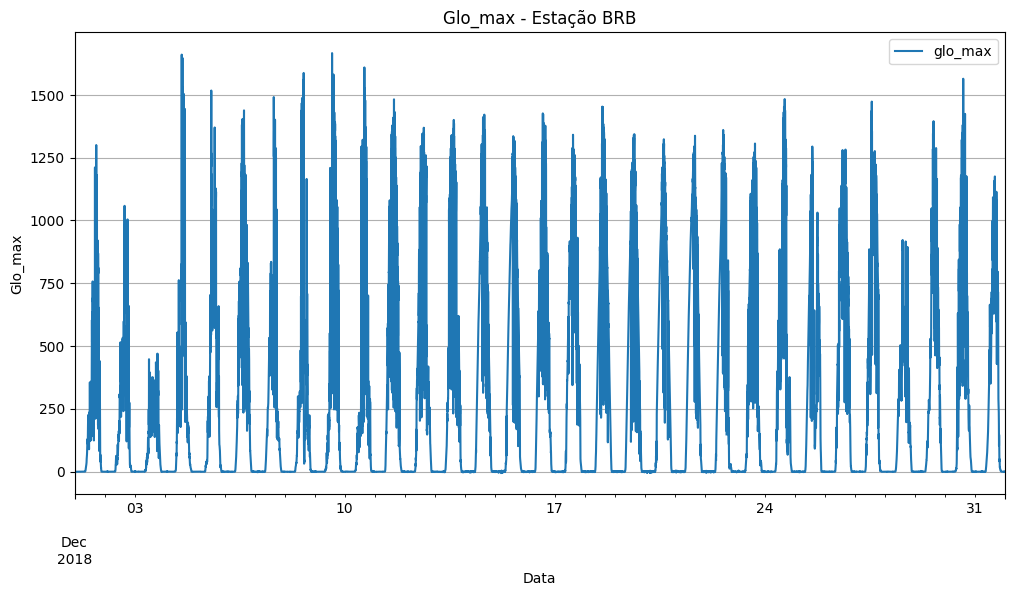

In [36]:
# Seta coluna timestamp como índice e plota variável glo_max
plot_estacao = estacao_df.set_index('timestamp').sort_index()
plot_estacao[['glo_max']].plot(title='Glo_max - Estação BRB', figsize=(12, 6))
plt.xlabel('Data')
plt.ylabel('Glo_max')
plt.grid()
plt.show()

In [15]:
import warnings
warnings.filterwarnings("ignore")

def verifica_temporal(base):
    # Faz um agrupamento por acronym e timestamp para verificar se os dados são temporais, fazendo a contagem de registros por dia
    query = f"""
    SELECT acronym, DATE_TRUNC('year', timestamp) AS data, COUNT(*) AS registros
    FROM {base}
    GROUP BY acronym, data
    ORDER BY data
    """
    return con.execute(query).fetch_df()


def plot_tempora(df, titulo):
    df["year"] = df["data"].dt.year
    df["month"] = df["data"].dt.month
    df = df.dropna(subset=["year"])
    df["year"] = df["year"].astype(int)
    # Reagrupando os dados para evitar duplicatas ao pivotar
    df_grouped = df.groupby(["acronym", "year"])["registros"].sum().reset_index()
    # Criando a matriz pivot corrigida
    heatmap_data = df_grouped.pivot(index="acronym", columns="year", values="registros")
    # Criando a figura
    plt.figure(figsize=(8, max(4, len(heatmap_data) * 0.2)))  # Ajusta dinamicamente o tamanho
    sns.heatmap(heatmap_data, cmap="coolwarm_r", linewidths=0.5, linecolor="gray", 
                cbar_kws={'label': 'Número de Registros'}, annot=False)
    # Ajustando o gráfico
    plt.title(titulo)
    plt.xlabel("Ano")
    plt.ylabel("Estação")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

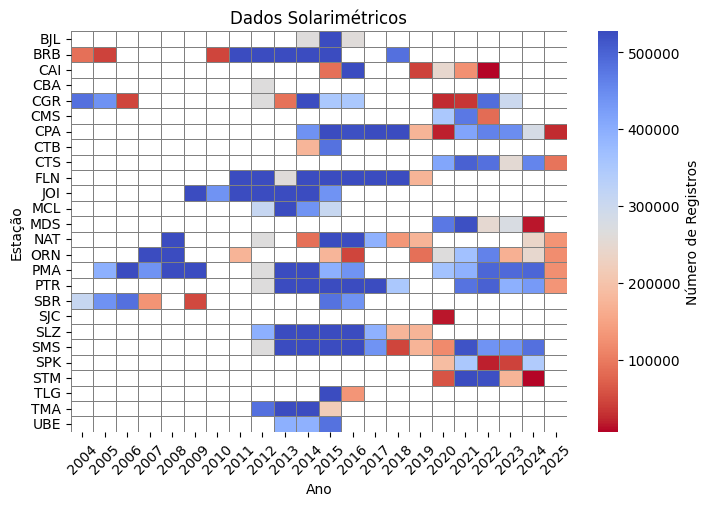

In [16]:
# Plotando os dados temporais de dados disponíveis
temporal_solar = verifica_temporal(NOME_DA_TABELA)
plot_tempora(temporal_solar, 'Dados Solarimétricos')

In [25]:
url = 'https://drive.google.com/uc?id=1P4h_uGZ8CtZJmkLjemjuYTfkIr5vX3mJ'
gdown.download(url, 'quarentena.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1P4h_uGZ8CtZJmkLjemjuYTfkIr5vX3mJ
To: /home/helvecioneto/sonda-curadoria/quarentena.csv
100%|██████████| 683k/683k [00:00<00:00, 3.22MB/s]


'quarentena.csv'

In [28]:
import pandas as pd

# Lê o arquivo CSV quarentena.csv
quarentena_df = pd.read_csv('quarentena.csv')

In [31]:
quarentena_df

,qid,estacao,tipo,tipo_completo,data_tratamento,status,problema,data_detecao,path
0,3112070185,SPK,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:31:12,output/sonda-quarentena/SPK/Solarimetricos/SPK...
1,3112092973,SPK,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:31:12,output/sonda-quarentena/SPK/Solarimetricos/SPK...
2,3112119030,SPK,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:31:12,output/sonda-quarentena/SPK/Solarimetricos/SPK...
3,3112149026,SPK,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:31:12,output/sonda-quarentena/SPK/Solarimetricos/SPK...
4,3112174858,SPK,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:31:12,output/sonda-quarentena/SPK/Solarimetricos/SPK...
...,...,...,...,...,...,...,...,...,...
2930,4547090144,CAI,SD,Solarimetricos,NaN,quarentena,"número de linhas menor que o esperado, esperad...",2025-05-17 19:45:47,output/sonda-quarentena/CAI/Solarimetricos/CAI...
2931,4547970718,CAI,SD,Solarimetricos,NaN,quarentena,"número de linhas menor que o esperado, esperad...",2025-05-17 19:45:47,output/sonda-quarentena/CAI/Solarimetricos/CAI...
2932,4549029314,CAI,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:45:49,output/sonda-quarentena/CAI/Solarimetricos/CAI...
2933,4549687305,CAI,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:45:49,output/sonda-quarentena/CAI/Solarimetricos/CAI...


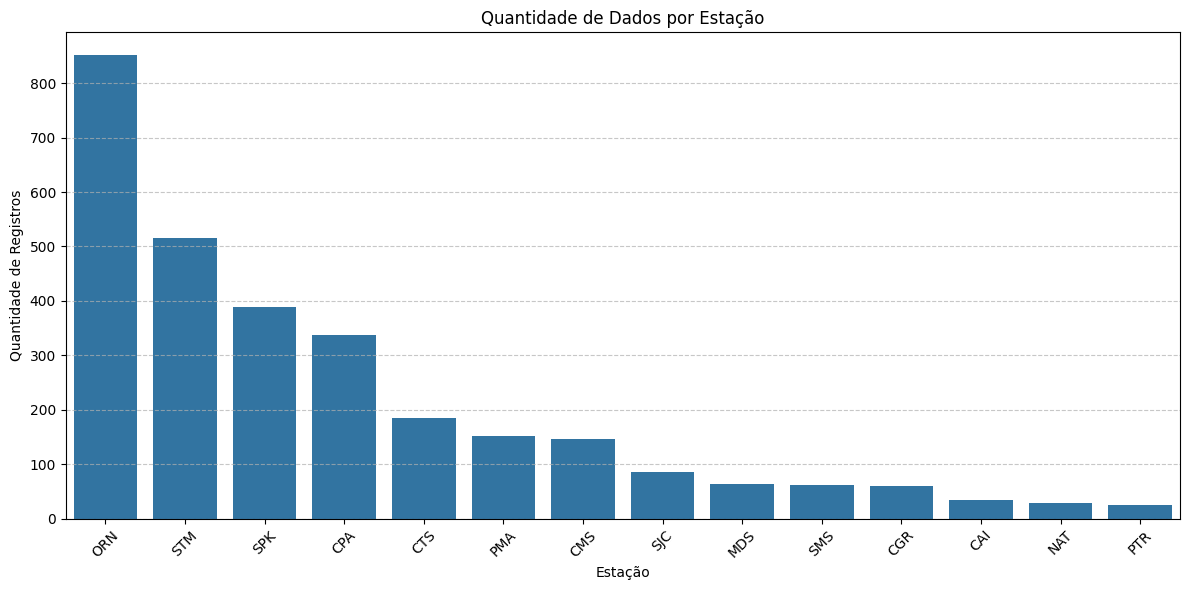

In [33]:
# Agrupando os dados por estação e contando registros
estacao_counts = quarentena_df.groupby('estacao').size().reset_index(name='contagem')

# Ordenando por contagem para melhor visualização
estacao_counts = estacao_counts.sort_values('contagem', ascending=False)

# Criando gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='estacao', y='contagem', data=estacao_counts)

# Adicionando título e rótulos
plt.title('Quantidade de Dados por Estação')
plt.xlabel('Estação')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
# Exibindo a tabela com as contagens
print("Número de registros por estação:")
print(estacao_counts)

Número de registros por estação:
   estacao  contagem
7      ORN       851
13     STM       515
12     SPK       388
3      CPA       338
4      CTS       185
8      PMA       151
2      CMS       147
10     SJC        86
5      MDS        64
11     SMS        61
1      CGR        60
0      CAI        35
6      NAT        29
9      PTR        25
